# In Financial World, Analyst generally used MS Excell to calculate calculating principal and interest portion of instalment using PPMT, IPMT functions,doing  the same using popular data science programming languages Python

In [1]:
#Monthly instalment is calculated based on the following formula assuming constant payment and constant interest rate

#PMT  = (rate*(fv+pv*(1+ rate)^nper))/((1+rate*type)*(1-(1+ rate)^nper))
#rate = Interest rate per month
#fv   = future value after the full loan is repaid.
#pv   = loan amount
#nper = Number of payments for loan
#type=0 = Payments are due at the end of the period. type = 1 Payments are due at the beginning of the period


def PMT(rate, nper,pv, fv=0, type=0):
    if rate!=0:
               pmt = (rate*(fv+pv*(1+ rate)**nper))/((1+rate*type)*(1-(1+ rate)**nper))
    else:
               pmt = (-1*(fv+pv)/nper)  
    return(pmt)


#Interest portion of monthly instalment 
#Calculation behind this function is dependent on PMT function.
#per = nth period
def IPMT(rate, per, nper,pv, fv=0, type=0):
  ipmt = -( ((1+rate)**(per-1)) * (pv*rate + PMT(rate, nper,pv, fv=0, type=0)) - PMT(rate, nper,pv, fv=0, type=0))
  return(ipmt)


#PPMT function returns principal portion of instalment.Difference between instalment amount and interest amount.
def PPMT(rate, per, nper,pv, fv=0, type=0):
  ppmt = PMT(rate, nper,pv, fv=0, type=0) - IPMT(rate, per, nper, pv, fv=0, type=0)
  return(ppmt)

In [2]:
#To calculate interest and principal amount of instalment of each period, 
#we need to loop PPMT and IPMT functions over sequence of periods of loan payment.

import numpy as np
import pandas as pd

def amortisation_schedule(amount, annualinterestrate, paymentsperyear, years):

    df = pd.DataFrame({'Principal' :[PPMT(annualinterestrate/paymentsperyear, i+1, paymentsperyear*years, amount)
                                     for i in range(paymentsperyear*years)],
                        'Interest' :[IPMT(annualinterestrate/paymentsperyear, i+1, paymentsperyear*years, amount)
                                              for i in range(paymentsperyear*years)]
                      }
                     )
    
    df['Instalment'] = df.Principal + df.Interest
    df['Balance'] = amount + np.cumsum(df.Principal) #Return the cumulative sum
    return(df)


In [39]:
df = amortisation_schedule(400000, 0.1055, 12, 4)

In [44]:
df.head(5)

,Principal,Interest,Instalment,Balance
0,-6734.346731,-3516.666667,-10251.013398,393265.653269
1,-6793.552863,-3457.460535,-10251.013398,386472.100406
2,-6853.279515,-3397.733883,-10251.013398,379618.820892
3,-6913.531264,-3337.482134,-10251.013398,372705.289628
4,-6974.312726,-3276.700671,-10251.013398,365730.976901


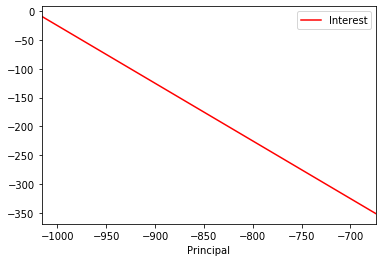

In [38]:
import matplotlib.pyplot as plt
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='Principal',y='Interest',color='red',ax=ax)
#df.plot(kind='scatter',x='Principal',y='Balance' ,color='green',ax=ax)
plt.show()


In [4]:
df.describe()

,Principal,Interest,Instalment,Balance
count,48.000000,48.000000,4.800000e+01,4.800000e+01
mean,-833.333333,-191.768006,-1.025101e+03,2.097914e+04
std,101.971090,101.971090,4.595596e-13,1.170058e+04
min,-1016.167534,-351.666667,-1.025101e+03,3.856258e-10
25%,-916.855678,-278.710933,-1.025101e+03,1.139545e+04
50%,-827.245767,-197.855573,-1.025101e+03,2.167765e+04
75%,-746.390406,-108.245662,-1.025101e+03,3.095533e+04
max,-673.434673,-8.933806,-1.025101e+03,3.932657e+04
